# Look of A Superhero

## Executive Summary

Do superheroes contribute to cultural stereotypes? The following project will analyze the superhero dataset taken from https://www.kaggle.com/claudiodavi/superhero-set/data, which will address the question stated above. In particular, the project will examine what characteristics determine hero alignment, good or bad. Uncovering how physical features, race, and gender impact alignment will indicate which characteristics are presented as positive or good.

## Introduction

Comic books and superheroes have been around for decades. With the recent popularity of the Marvel movie franchise, the genre’s influence on society is undeniable. The imagery and concepts found in this fantasy realm transfers to reality and vice versa. Looking at which hero characteristics lead to what alignment provides insight as to how people are represented through entertainment. Thus, societal representation through superheroes is a relevant and important aspect that should be fully explored.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB

In [3]:
df = pd.read_csv('C:\\Users\\cocob\\Downloads\\heroes_information.csv')

## Basic Info about Dataset

In [4]:
df.head()

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,ABomb,Male,yellow,Human,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Alien,Cosmic Entity,Black,99.0,Marvel Comics,NaN,bad,99.0


In [5]:
df.shape

(734, 11)

In [6]:
df.describe()

,Height,Weight
count,734.000000,732.000000
mean,160.790872,107.961749
std,63.845126,85.843309
min,15.200000,2.000000
25%,99.000000,74.000000
50%,175.000000,99.000000
75%,185.000000,99.000000
max,975.000000,900.000000


In [7]:
df.isnull().sum()# looking to see if here are any missing variables

name            0
Gender         29
Eye color     172
Race          304
Race.1        304
Hair color    172
Height          0
Publisher      15
Skin color    662
Alignment       0
Weight          2
dtype: int64

## Data Transformation

Below is feature creation. I broke up height and weight into short & tall, and small & big because I wanted to do a simple representation for those features. All the features are a matter of personal choice. I wanted to work with features that are either a or b.

In [8]:
df['Height2'] = np.where(df['Height'] <= 175, 'Short', 'Tall')

In [9]:
df['Weight2'] = np.where(df['Weight'] <= 99, 'Small', 'Big') 

In [10]:
df['Human'] = np.where((df['Race'].isin(['Human'])), 1, 0)

In [11]:
df['Male'] = np.where((df['Gender'].isin(['Male'])), 1, 0)

In [12]:
df['Female'] = np.where((df['Gender'].isin(['Female'])), 1, 0)

In [13]:
df['Good'] = np.where((df['Alignment'].isin(['good'])), 1, 0)

In [14]:
df['Bad'] = np.where((df['Alignment'].isin(['bad'])), 1, 0)

In [15]:
df['Hair'] = np.where((df['Hair color'].isin(['No Hair'])), 'No Hair', 'Hair')

In [16]:
df['Hair2'] = np.where((df['Hair color'].isin(['No Hair'])), 0, 1)

In [18]:
df2=df.dropna()# droped missing features since there are many

In [20]:
df2.head()#visual of the data

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight,Height2,Weight2,Human,Male,Female,Good,Bad,Hair,Hair2
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Tall,Small,0,1,0,1,0,No Hair,0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Tall,Small,0,1,0,1,0,No Hair,0
34,Apocalypse,Male,red,Mutant,Mutant,Black,213.0,Marvel Comics,grey,bad,135.0,Tall,Big,0,1,0,0,1,Hair,1
39,Archangel,Male,blue,Mutant,Mutant,Blond,183.0,Marvel Comics,blue,good,68.0,Tall,Small,0,1,0,1,0,Hair,1
41,Ardina,Female,white,Alien,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,Tall,Small,0,0,1,1,0,Hair,1


## Exploratory Analysis

## Feature Correlation

In [21]:
df2.corr()#to see how the features are related to one another

,Height,Weight,Human,Male,Female,Good,Bad,Hair2
Height,1.000000,0.073728,-0.052855,0.116600,-0.116600,0.078180,-0.088085,-0.166414
Weight,0.073728,1.000000,0.168399,0.276783,-0.276783,-0.193114,0.060165,-0.152659
Human,-0.052855,0.168399,1.000000,-0.159176,0.159176,-0.048828,0.135037,0.185581
Male,0.116600,0.276783,-0.159176,1.000000,-1.000000,-0.113685,0.053561,-0.373097
Female,-0.116600,-0.276783,0.159176,-1.000000,1.000000,0.113685,-0.053561,0.373097
Good,0.078180,-0.193114,-0.048828,-0.113685,0.113685,1.000000,-0.756100,-0.156987
Bad,-0.088085,0.060165,0.135037,0.053561,-0.053561,-0.756100,1.000000,-0.007285
Hair2,-0.166414,-0.152659,0.185581,-0.373097,0.373097,-0.156987,-0.007285,1.000000


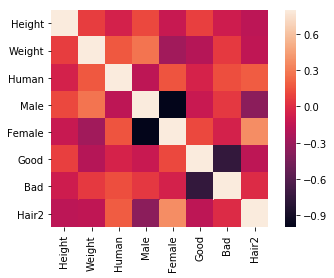

In [22]:
#visually demonstrate that the independent features are truly independent
corrmat = df2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Graphs

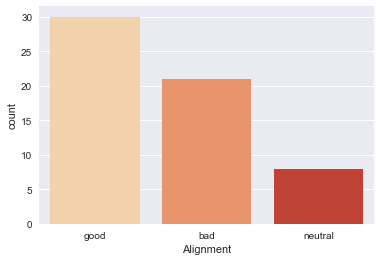

In [23]:
sns.set(style='darkgrid')
sns.countplot(x='Alignment', data=df2, palette= 'OrRd');

The graph above demonstrates how many superheros are bad, good, or neutral. For the purpose of this project, main focus will be directed toward good and bad alignment. The analysis below will determine which gender, skin color, hair, and race generate what alignment.

### Height and Weight determination for Alignment

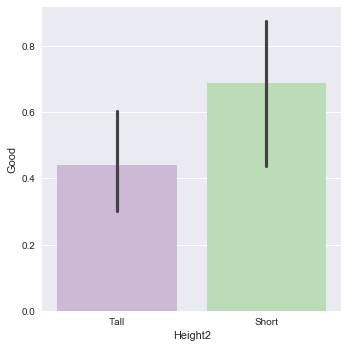

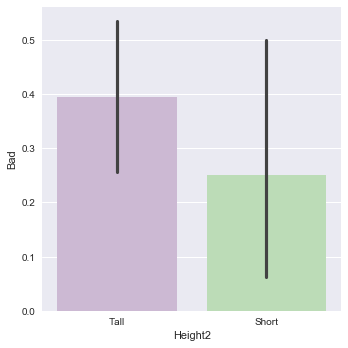

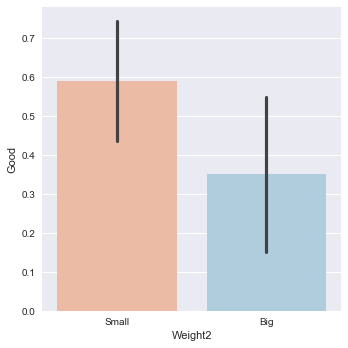

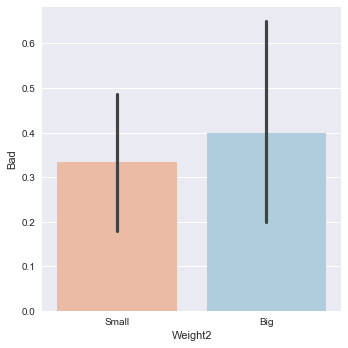

In [24]:
sns.set(style='darkgrid')
sns.factorplot(x='Height2', y='Good', data=df2, size=5, kind='bar', palette='PRGn')
plt.show()

sns.factorplot(x='Height2', y='Bad', data=df2, size=5, kind='bar', palette='PRGn')
plt.show()

sns.factorplot(x='Weight2', y='Good', data=df2, size=5, kind='bar', palette='RdBu')
plt.show()

sns.factorplot(x='Weight2', y='Bad', data=df2, size=5, kind='bar', palette='RdBu')
plt.show()

Based on the graphics above, short and small superheros are more likely to be good than big and tall superheros. As height and weight increases, superhero alignment shifts towards bad.

Gender and Alignment Correlation(I did not use these for the final presentation. Only the graphs)

In [26]:
stats.ttest_ind(df['Bad'], df['Male'])

Ttest_indResult(statistic=-17.01899303313765, pvalue=2.0534843544272114e-59)

In [27]:
stats.ttest_ind(df['Good'], df['Male'])

Ttest_indResult(statistic=-0.5040477086887254, pvalue=0.6143035910718535)

In [28]:
stats.ttest_ind(df['Bad'], df['Female'])

Ttest_indResult(statistic=0.40788221587086176, pvalue=0.6834197088324643)

In [29]:
stats.ttest_ind(df['Good'], df['Female'])

Ttest_indResult(statistic=16.900485622867876, pvalue=1.1084252540076607e-58)

Given the p-values, there is a correlation between gender and alignment. Males are more likely to be bad in comparison to females who have a stronger correlation for being good. The graph below visualizes this point.

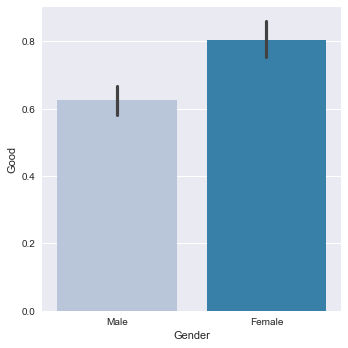

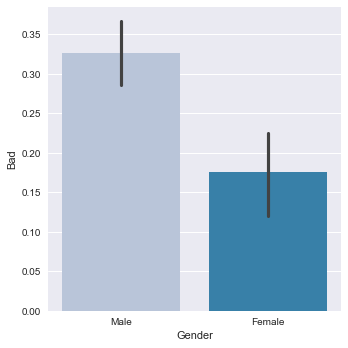

In [30]:
sns.set(style='darkgrid')
sns.factorplot(x='Gender', y='Good', data=df, size=5, kind='bar', palette='PuBu')
plt.show()

sns.factorplot(x='Gender', y='Bad', data=df, size=5, kind='bar', palette='PuBu')
plt.show()

### Alignment by Physical Features

#### Hero Alignment Given Skin Color

In [27]:
#crosstab not used for final presentation
pd.crosstab(df['Alignment'], df['Skin color'],margins=True)#this is a clear way to see which color aligns with what.

Skin color,black,blue,bluewhite,gold,gray,green,grey,orange,orange / white,pink,purple,red,red / black,silver,white,yellow,All
Alignment,,,,,,,,,,,,,,,,,
bad,1,3,0,0,0,6,4,0,0,0,2,4,1,3,3,1,28
good,0,5,0,2,1,14,1,1,1,2,0,3,0,2,3,0,35
neutral,0,1,1,1,0,1,0,0,0,0,1,2,0,0,1,1,9
All,1,9,1,3,1,21,5,1,1,2,3,9,1,5,7,2,72


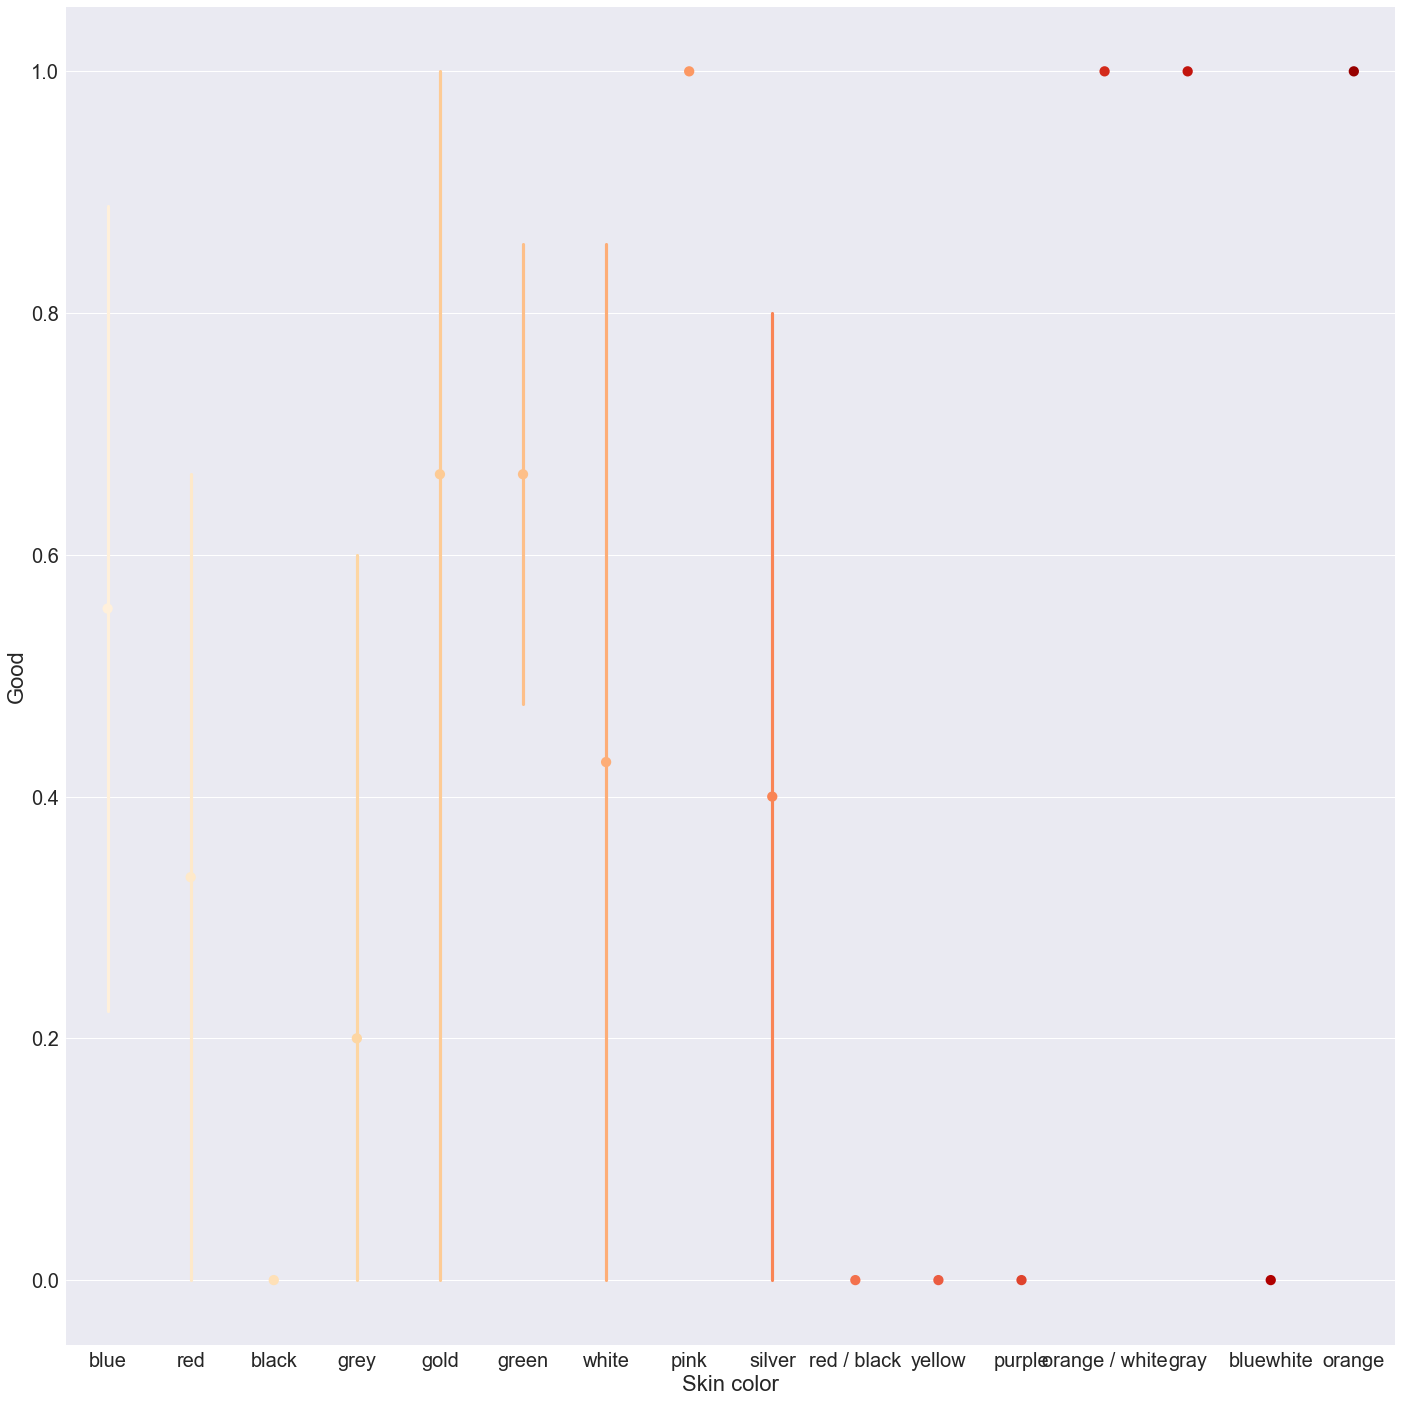

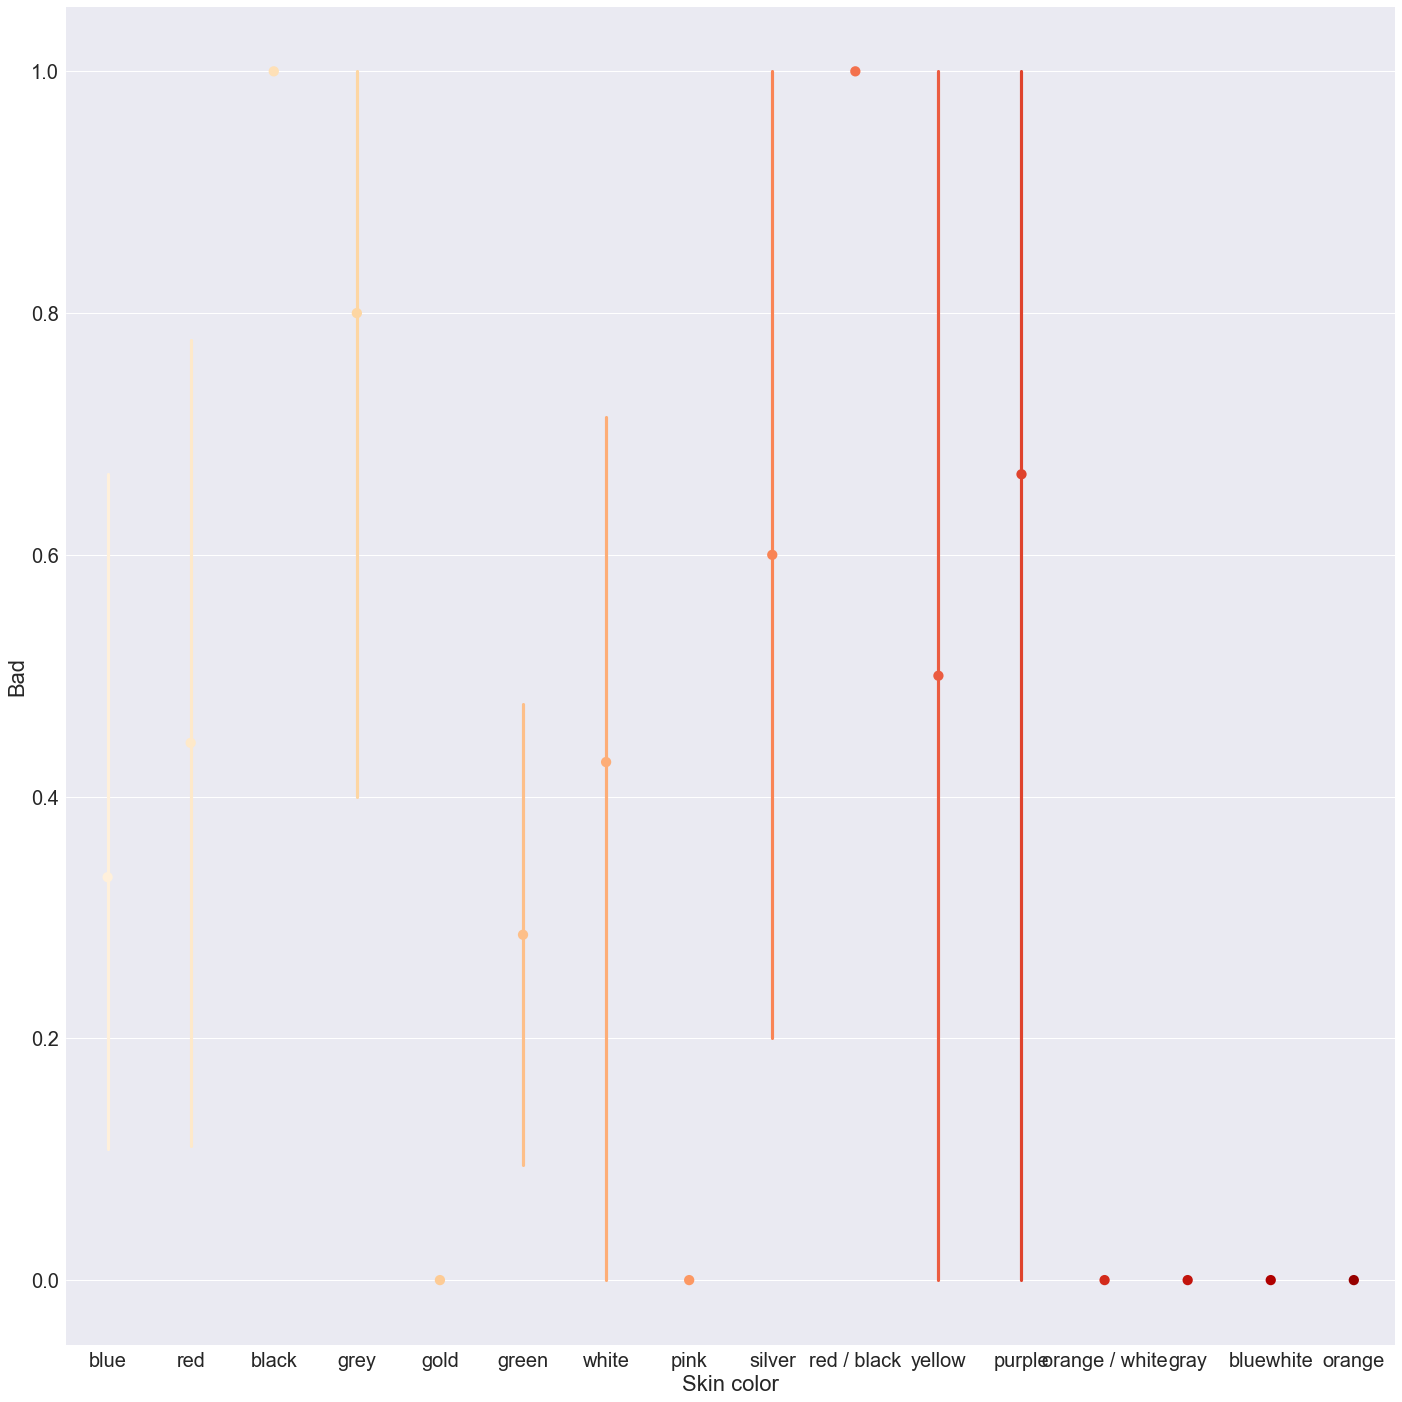

In [26]:
sns.set(font_scale=2)
sns.factorplot(x='Skin color', y='Good', data=df, size=20, palette='OrRd')
plt.show()

sns.factorplot(x='Skin color', y='Bad', data=df, size=20, palette='OrRd')
plt.show()

Shown above is the superhero alignment by skin color. Most notable colors were blue, red, grey, and green since majority of superheroes are these colors. Grey superheroes illustrate less of a chance in being bad. While the black superhero is likely to align as bad, the n value in only one.

Upon inspection, grey spectrum skin colors were more likely to display bad alignment in comparison to the remaining colors. This notion demonstrates that color vibrancy may be an indicator of character alignment.

#### Alignment based on Hair

In [28]:
#not used in final presentation
df['Hair2'] = np.where((df['Hair color'].isin(['No Hair'])), 0, 1)
stats.ttest_ind(df['Bad'], df['Hair2'])

Ttest_indResult(statistic=-30.736655498666014, pvalue=1.518703872000688e-160)

In [29]:
#not used in final presentation
stats.ttest_ind(df['Good'], df['Hair2'])

Ttest_indResult(statistic=-10.783684960480832, pvalue=3.8190308232290055e-26)

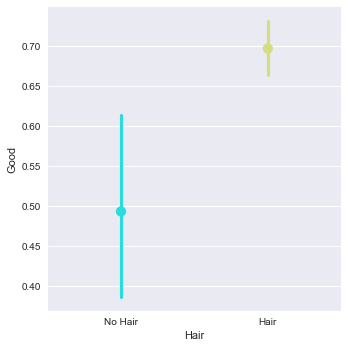

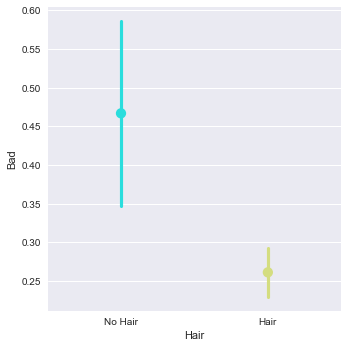

In [30]:
sns.set(style='darkgrid')
sns.factorplot(x='Hair', y='Good', data=df, kind='point', palette='rainbow', size=5)
plt.show()

sns.factorplot(x='Hair', y='Bad', data=df, kind='point', palette='rainbow', size=5)
plt.show()

Based on the info provided above, superhereos with hair are more likely to align good. Contrastly, superhereos without hair are more likely to align bad.

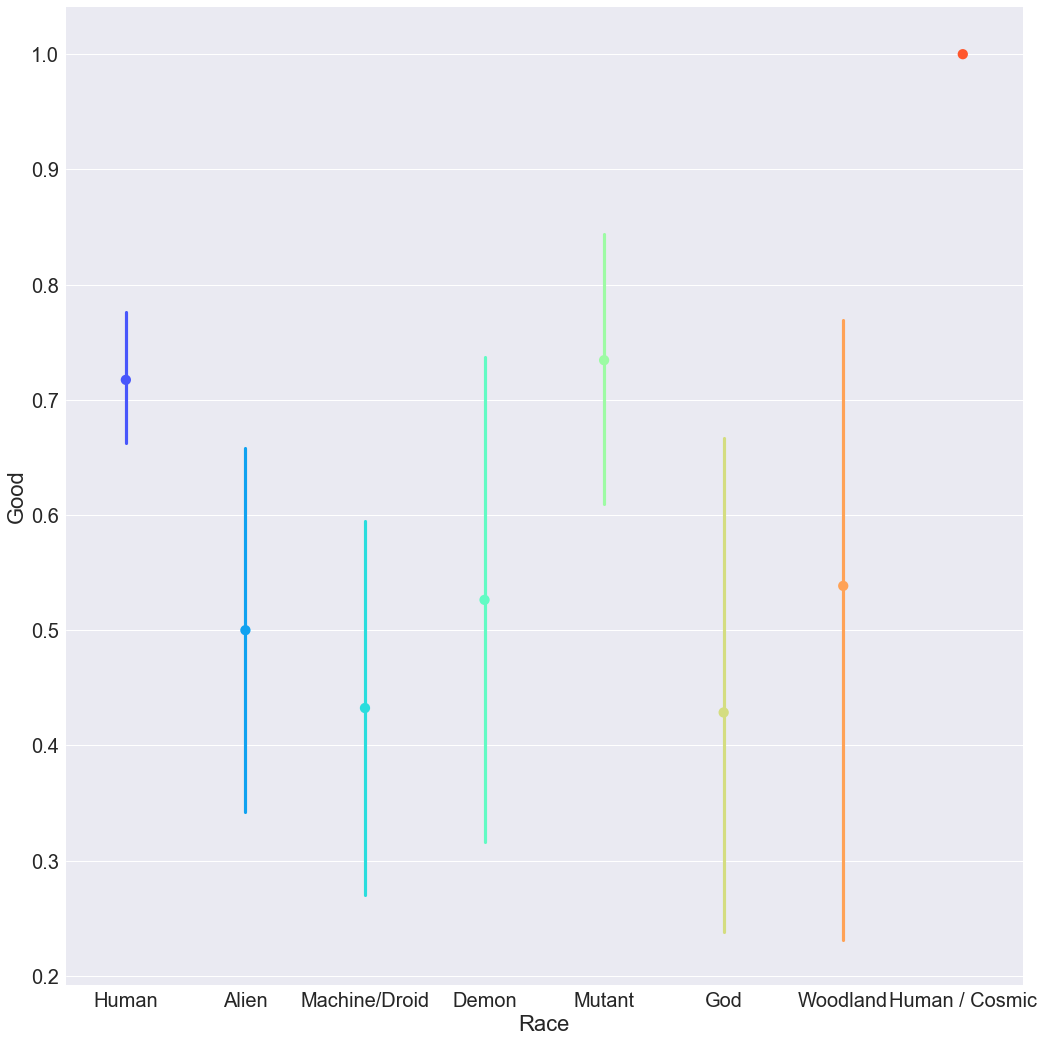

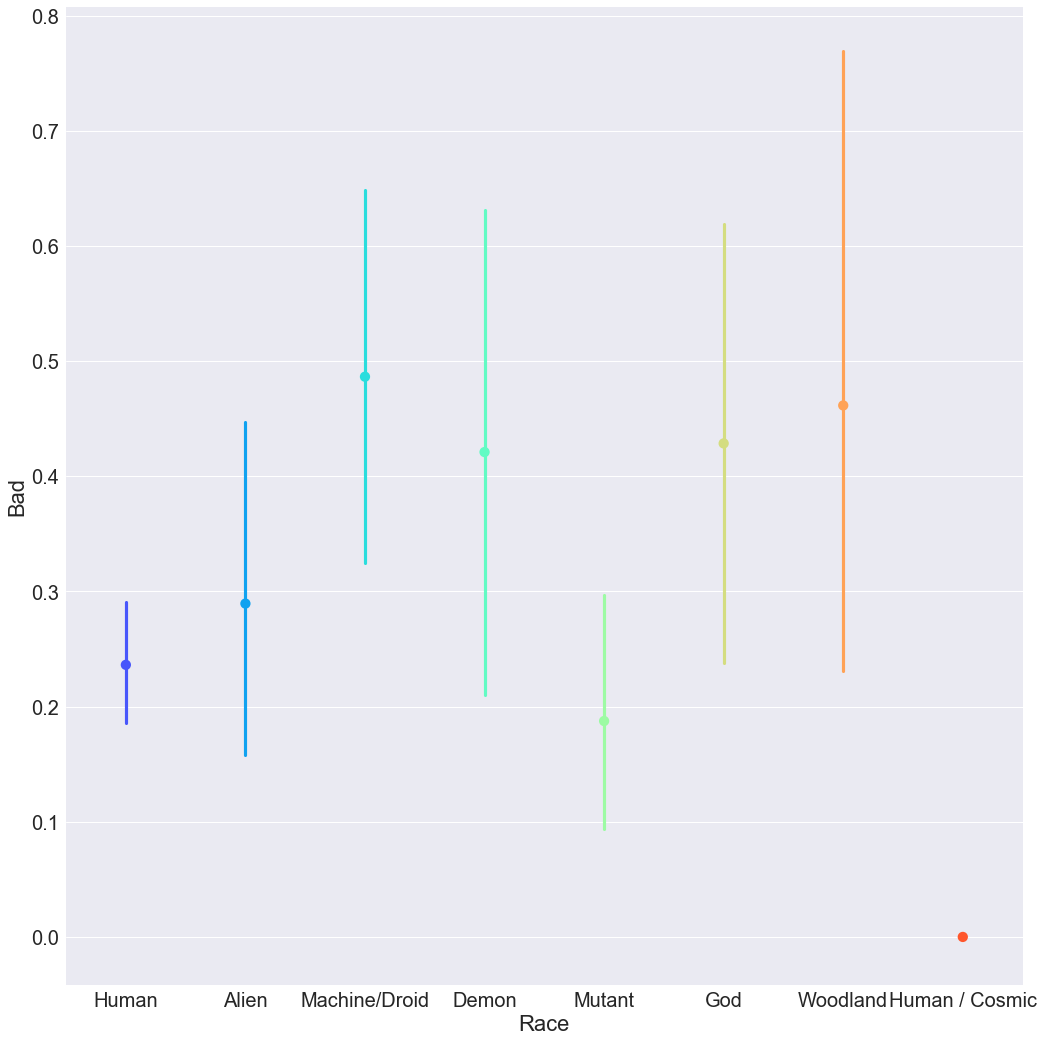

In [31]:
sns.set(font_scale=2)
sns.factorplot(x='Race', y='Good', data=df, kind='point', palette='rainbow', size=15)
plt.show()

sns.factorplot(x='Race', y='Bad', data=df, kind='point', palette='rainbow', size=15)
plt.show()

Most Races vary staying within between bad and almost good. Woodland, Demon, and god consist of a wide range. Humans and Mutants trend closer to good. While Human/Cosmic aligns good, there is only a n value of one.

## Random Forest

In [45]:
# chose this model because handles any class imbalances
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [46]:
X=pd.get_dummies(df2[['Gender', 'Race', 'Skin color', 'Hair', 'Height2', 'Weight2']]).dropna()

In [47]:
rfc = ensemble.RandomForestClassifier()
Y = df2['Good']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X_array = np.array(X.dropna(axis=1))
Y = pd.get_dummies(Y)

cross_val_score(rfc, X_array, Y, cv=10)
#each numer is each section of teh fold

array([0.66666667, 0.5       , 0.66666667, 0.66666667, 0.5       ,
       0.66666667, 0.5       , 0.33333333, 0.5       , 0.4       ])

In [48]:
rfc.fit(X, Y)
rfc.score(X, Y)

0.9491525423728814

#### Generating Feature Importance

In [42]:
rfc.feature_importances_

array([0.0451635 , 0.0174661 , 0.06701612, 0.02685611, 0.04431322,
       0.06149896, 0.00026613, 0.01733909, 0.05024416, 0.0200775 ,
       0.03831662, 0.00169931, 0.01263673, 0.01155798, 0.07866072,
       0.02531365, 0.00270723, 0.01633402, 0.04364333, 0.08120624,
       0.02416724, 0.02858972, 0.02905164, 0.05934496, 0.03419337,
       0.01791599, 0.05170226, 0.03566438, 0.0570537 ])

In [43]:
var_nam=pd.get_dummies(df2[['Gender', 'Race', 'Skin color', 'Hair', 'Height2', 'Weight2']]).dropna().columns
importance = pd.DataFrame(rfc.feature_importances_,index = var_nam, columns = ['importance']).sort_values('importance',ascending = False)
importance

,importance
Skin color_red,0.081206
Skin color_green,0.078661
Race_Alien,0.067016
Race_Human,0.061499
Hair_Hair,0.059345
Weight2_Small,0.057054
Height2_Tall,0.051702
Race_Mutant,0.050244
Gender_Female,0.045164
Race_God,0.044313


Based on the results above, hair, gender, race, and skin color are good predictors for alignment.

## Conclusion

As evidenced by the model above, key features in predicting good alignment are hair, skin color, weight, and race. The ideal good superhero candidate has hair, is female, short and small in stature, has a green or blue skin tone, and is human. When looking at the broader picture, this analysis sheds light into how superheroes attribute to societal stereotypes and beauty standards. 

Beginning with hair, hero alignment is most influenced by hair. Think of all the hair loss products and obsession with healthy hair that is constantly barraged on television. Sci-fi/Fantasy superhero genre is no exception to this trend. By linking alignment to the presence of hair, superheroes are sending the clear message: don’t be bald.

The second feature of importance is skin color. Within the analysis, vibrant colors such as green, blue, and gold demonstrated a higher probability of aligning with good. Grey spectrum colors such as grey, white, and black present a wider range for alignment but maintained a lower probability of being good. Vibrancy seems to be a key aspect for good superheroes. Colors that are more likely to catch the eye generate superheroes that are good.

Weight is the third most important feature. Superhero weight ties into the concept of body image and how it is represented through media. Smaller framed superheroes were most likely to align with good. Linking this with gender, females had a higher rate of aligning good than their male counterparts. The stereotypical image of females through media is often being tiny and waif like. On the other hand, males are muscular and to be feared/dominate. According to the results of this analysis, superheroes fall directly into that stereotype. Males and bigger framed individuals are less likely to align with good, thus, following the stereotypical male ideal.

The final feature of importance is race. From the analysis, the conclusion is humans are most likely to be good. This notion relates to the concept of the other. The other being an outsider or different from the collective group. By showing human superheroes or mutants (human mutations) are most likely to be good and the rest are bad, superheroes are indicating that outsiders are not good. Mistrust of those that are different is the message taken from race-based alignment for superheroes.

Given these findings, here is the real-world application. This information basically outlines how to generate a superhero. The industry could use this model to help create the typical hero or villain. Furthermore, the information may be used for superhero creation that goes against the norms and addresses some of the issues described above. All in all, this analysis is an outline for the look of a superhero.
